## Random Forest

In [6]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
htru2 = fetch_ucirepo(id=372) 
  
# data (as pandas dataframes) 
X = htru2.data.features 
y = htru2.data.targets 
  



In [7]:
X

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306
...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910


In [8]:
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
17893,0
17894,0
17895,0
17896,0


In [9]:
y.value_counts()

class
0        16259
1         1639
Name: count, dtype: int64

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, roc_auc_score
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier  


### Data Transformation

In [11]:
df = pd.concat([X,y], axis = 1)
df

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [13]:
results = []
for depth in range(3,11):
    rf_model = RandomForestClassifier(n_estimators=100, max_depth = depth, random_state=0)
    rf_model.fit(X_train, y_train.values.ravel())
    y_pred = rf_model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label=1)  
    rec = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label = 1)

    results.append({
        'Max Depth': depth,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1_score': f1
    })

results_df = pd.DataFrame(results)

In [14]:
results_df

,Max Depth,accuracy,precision,recall,f1_score
0,3,0.978957,0.936675,0.799550,0.862697
1,4,0.978585,0.929504,0.801802,0.860943
2,5,0.979888,0.932990,0.815315,0.870192
3,6,0.979330,0.928021,0.813063,0.866747
4,7,0.979702,0.926209,0.819820,0.869773
5,8,0.980261,0.931122,0.822072,0.873206
6,9,0.979888,0.924242,0.824324,0.871429
7,10,0.980447,0.922693,0.833333,0.875740


In [15]:
# Get the best depth
best_depth = results_df.loc[results_df['f1_score'].idxmax(), 'Max Depth']
best_f1 = results_df.loc[results_df['f1_score'].idxmax(), 'f1_score']
print(f"\n Best depth (by f1_score): {int(best_depth)} with f1_score {round(best_f1, 4)}")

best_rf = RandomForestClassifier(n_estimators=100, max_depth = best_depth, random_state=0)
best_rf.fit(X_train, y_train.values.ravel())
y_pred = best_rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, pos_label=1)  # or 'weighted' depending on your needs
rec = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label = 1)



 Best depth (by f1_score): 10 with f1_score 0.8757


In [16]:
print(acc)
print(prec)
print(rec)
print(f1)

0.9804469273743017
0.9226932668329177
0.8333333333333334
0.8757396449704142



 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4926
           1       0.92      0.83      0.88       444

    accuracy                           0.98      5370
   macro avg       0.95      0.91      0.93      5370
weighted avg       0.98      0.98      0.98      5370



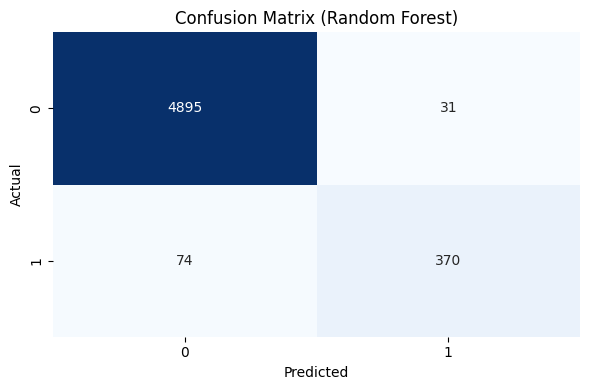

In [17]:
# Classification report
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f"Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()